<a href="https://colab.research.google.com/github/sinha-debojyoti/FSP_Project/blob/master/Fruit_Color_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module Import**
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

sns.set_style("darkgrid")
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. **Data Collection**
---

In [2]:
fruit_data = pd.read_table("fruit_data_with_colors.txt")
fruit_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


# 2. **Data Analysis**
---

In [3]:
fruit_data.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

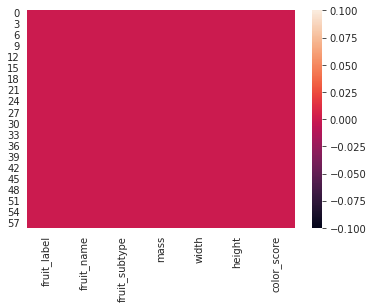

In [4]:
sns.heatmap(fruit_data.isnull())

plt.show()

In [5]:
fruit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


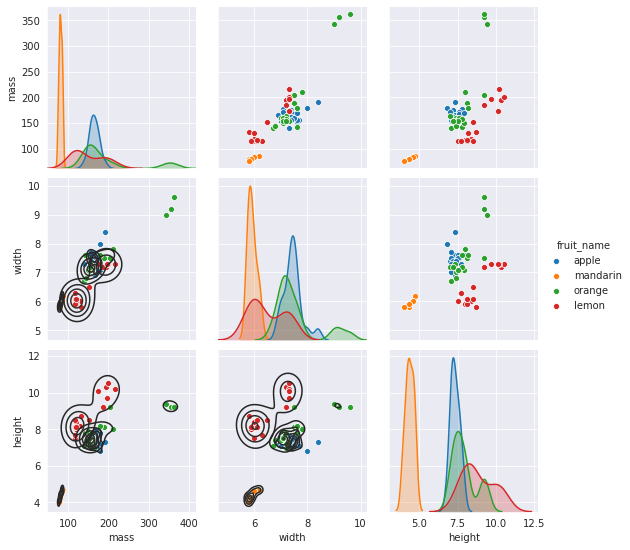

In [6]:
graph_fruit_data = fruit_data[["fruit_name", "mass", "width", "height"]]

g = sns.pairplot(graph_fruit_data, hue="fruit_name")
g.map_lower(sns.kdeplot, levels=4, color=".2")

plt.show()

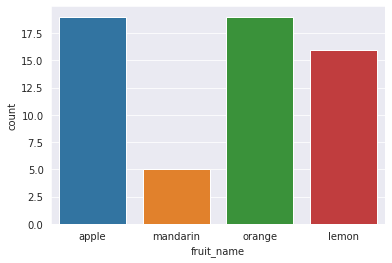

In [7]:
sns.countplot(x="fruit_name", data=fruit_data)

plt.show()

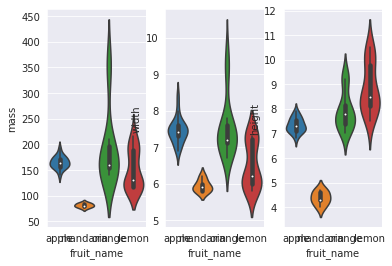

In [8]:
fig, axs = plt.subplots(ncols=3)

sns.violinplot(x="fruit_name", y="mass", scale="width", data=fruit_data, ax=axs[0])
sns.violinplot(x="fruit_name", y="width", scale="width", data=fruit_data, ax=axs[1])
sns.violinplot(x="fruit_name", y="height", scale="width", data=fruit_data, ax=axs[2])

plt.show()

# 3. **Training And Testing**
---

In [9]:
X = fruit_data[["mass", "width", "height"]].values
X

array([[192. ,   8.4,   7.3],
       [180. ,   8. ,   6.8],
       [176. ,   7.4,   7.2],
       [ 86. ,   6.2,   4.7],
       [ 84. ,   6. ,   4.6],
       [ 80. ,   5.8,   4.3],
       [ 80. ,   5.9,   4.3],
       [ 76. ,   5.8,   4. ],
       [178. ,   7.1,   7.8],
       [172. ,   7.4,   7. ],
       [166. ,   6.9,   7.3],
       [172. ,   7.1,   7.6],
       [154. ,   7. ,   7.1],
       [164. ,   7.3,   7.7],
       [152. ,   7.6,   7.3],
       [156. ,   7.7,   7.1],
       [156. ,   7.6,   7.5],
       [168. ,   7.5,   7.6],
       [162. ,   7.5,   7.1],
       [162. ,   7.4,   7.2],
       [160. ,   7.5,   7.5],
       [156. ,   7.4,   7.4],
       [140. ,   7.3,   7.1],
       [170. ,   7.6,   7.9],
       [342. ,   9. ,   9.4],
       [356. ,   9.2,   9.2],
       [362. ,   9.6,   9.2],
       [204. ,   7.5,   9.2],
       [140. ,   6.7,   7.1],
       [160. ,   7. ,   7.4],
       [158. ,   7.1,   7.5],
       [210. ,   7.8,   8. ],
       [164. ,   7.2,   7. ],
       [19

In [10]:
y = (fruit_data["fruit_label"] - 1).values
y

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 4. **Model Building**
---

In [12]:
sse = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)
    
print(sse)

[101288.39948717947, 28984.34918918919, 11789.837185185184, 5229.513416149069, 3302.713623015873, 1704.5488611111111, 1093.3915000000002, 804.2225000000001, 604.0225, 422.79100000000005]


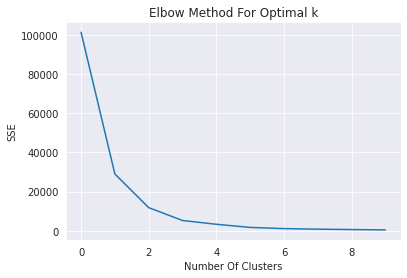

In [13]:
plt.plot(sse)
plt.xlabel("Number Of Clusters")
plt.ylabel("SSE")
plt.title('Elbow Method For Optimal k') 

plt.show()

# 5. **Training Model**
---

In [14]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# 6. **Test Model**
---

In [15]:
y_pred = kmeans.predict(X_test)
y_pred

array([3, 2, 0, 0, 3, 2, 0, 1, 3, 0, 2, 2, 0, 3, 3, 0, 2, 2, 2, 0],
      dtype=int32)

In [16]:
centers = kmeans.cluster_centers_
centers

array([[158.60869565,   7.26086957,   7.48695652],
       [352.        ,   9.3       ,   9.3       ],
       [112.85714286,   6.        ,   7.37142857],
       [194.85714286,   7.48571429,   9.04285714]])

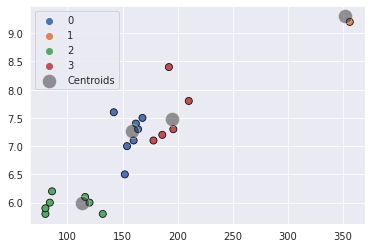

In [17]:
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], 
                hue=y_pred,
                palette="deep", s=50, edgecolor='black',)

sns.scatterplot(x=centers[:, 0], y=centers[:, 1],
                color="0.2",
                s=200, alpha=0.5, label='Centroids')
plt.show()

# 7. **Accuracy Score**
---

In [18]:
accuracy_score(y_test, y_pred)

0.3

# 8. **Confusion Matrix**
---

In [19]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[4, 0, 0, 2],
       [0, 0, 4, 0],
       [2, 1, 0, 1],
       [1, 0, 3, 2]])

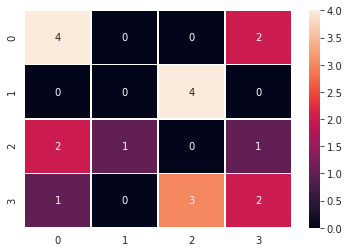

In [20]:
sns.heatmap(cm, annot=True, linewidths=.5)

plt.show()

# 9. **Classification Report**
---

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4
           3       0.40      0.33      0.36         6

    accuracy                           0.30        20
   macro avg       0.24      0.25      0.24        20
weighted avg       0.29      0.30      0.29        20

